In [92]:
import os
import modal
#import great_expectations as ge
import hopsworks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [93]:
project = hopsworks.login(api_key_value="uXImSp4Z2vZHA7sc.AJCLKvt1mkQ100KJcH4aHDVPNhkGCKUxtYE19sDe7MF0zyPf9zjjodcI0pVTHWmF")
fs = project.get_feature_store()

titanic_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/titanic.csv")

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/5379
Connected. Call `.close()` to terminate connection gracefully.


In [94]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
#summary summary
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
# fill missing values with mean column values for int and float columns
titanic_df.fillna(titanic_df.mean(), inplace=True)
# fill missing values with mode column values for object columns
titanic_df.fillna(titanic_df.mode().iloc[0], inplace=True)


<AxesSubplot: >

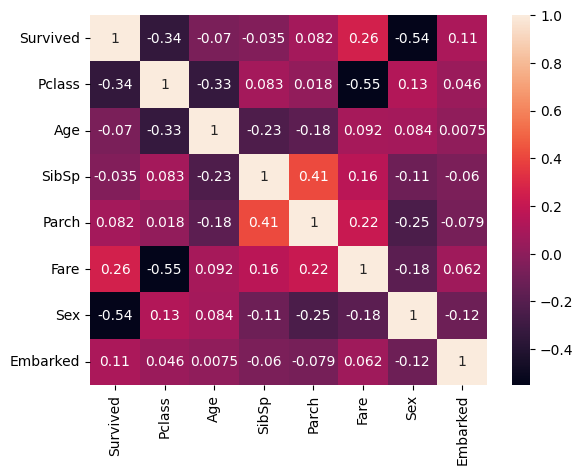

In [97]:
#plot correlation matrix between ints and floats features
#For sex transform to 0 and 1
titanic_df['Sex'].replace('female', 0,inplace=True)
titanic_df['Sex'].replace('male', 1,inplace=True)
titanic_df['Sex'].astype(int)

titanic_df['Embarked'].replace('S', 0,inplace=True)
titanic_df['Embarked'].replace('C', 1,inplace=True)
titanic_df['Embarked'].replace('Q', 2,inplace=True) 
titanic_df['Embarked'].astype(int)
# get correlations between numerical features
corr = titanic_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch','Fare', 'Sex', 'Embarked']].corr()
# plot the heatmap and annotation on it
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [98]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [99]:
#drop passenger id and Name
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
#Write the features to the feature store as a Feature Group
titanic_fg = fs.get_or_create_feature_group(
    name="titanic_modal",
    version=4,
    primary_key=["Pclass", "ArithmeticError", "SibSp", "Parch", "Fare", "Cabin", "Embarked", "Sex"], 
    description="titanic dataset")
titanic_fg.insert(titanic_df, write_options={"wait_for_job" : False})

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/5379/fs/5286/fg/5786


Uploading Dataframe: 0.00% |          | Rows 0/891 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/5379/jobs/named/titanic_modal_4_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7fb392552370>, None)